# Using Machine Learning to explain and predict the life expectancy of different countries

This project tries to create a model based on data provided by the World Health Organization (WHO) to evaluate the life expectancy for different countries in years. The data offers a timeframe from 2000 to 2015. The data originates from here: https://www.kaggle.com/kumarajarshi/life-expectancy-who/data

The output algorithms have been used to test if they can maintain their accuracy in predicting the life expectancy for data they haven’t been trained. Four algorithms have been used:

    1)Linear Regression.
    2)Ridge Regression.
    3)Lasso Regression.
    4)ElasticNet Regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
import seaborn as sns

### As this Machine Learning Model is deployed on the IBM Cloud, the following code needs to be added in the IBM Watson Studio Notebook to read the data file.

In [ ]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9b57de40ef994bb1be3c8a2dfe52311a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='*************************************',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_9b57de40ef994bb1be3c8a2dfe52311a.get_object(Bucket='lifeexpectancy-donotdelete-pr-hfccnyjh4kp9b4',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
life_data = pd.read_csv(body)
life_data.head()

In [2]:
life_data = pd.read_csv(r"C:\Users\asus\Downloads\Life Expectancy Data.csv")
life_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
life_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
life_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
life_data = life_data.drop('Year',axis = 1)

status = pd.get_dummies(life_data.Status)
life_data = pd.concat([life_data, status], axis = 1)
life_data = life_data.drop(['Status'], axis=1)
life_data.rename(columns = {'Developing' : 0, 'Developed' : 1})

life_data = life_data.groupby('Country').mean()
life_data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0,1


In [7]:
life_data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

## EDA

In [8]:
life_labels = life_data['Life expectancy ']
life_features = life_data.drop('Life expectancy ', axis = 1)

life_features.fillna(value = life_features.mean(), inplace = True)
life_labels.fillna(value = life_labels.mean(), inplace = True)

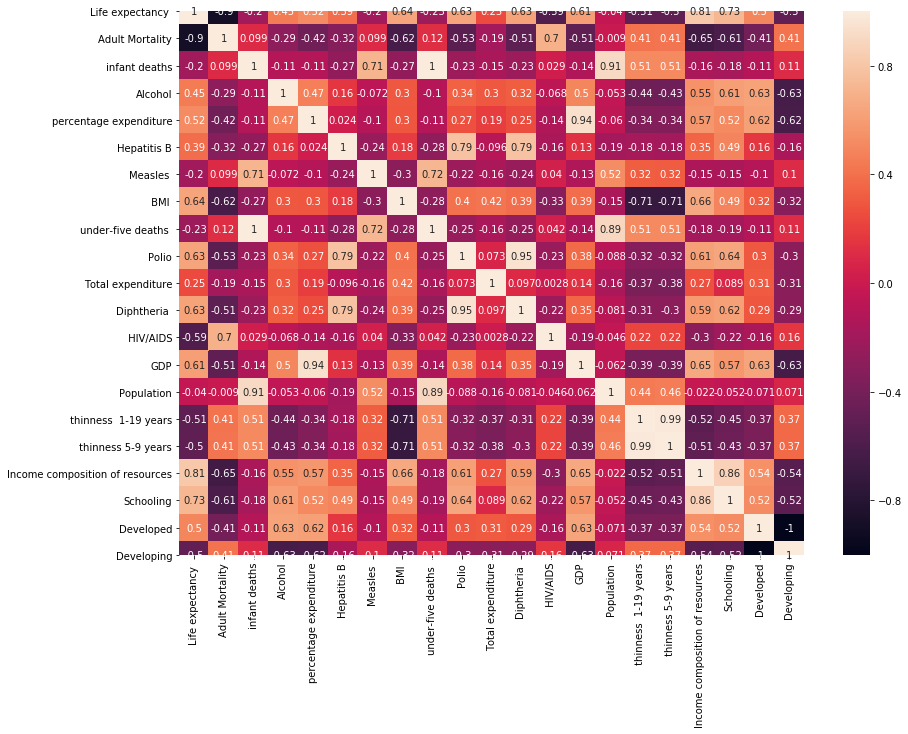

In [9]:
plt.figure(figsize = (14, 10))
sns.heatmap(life_data.corr(), annot = True)

Text(0, 0.5, 'Life expectancy')

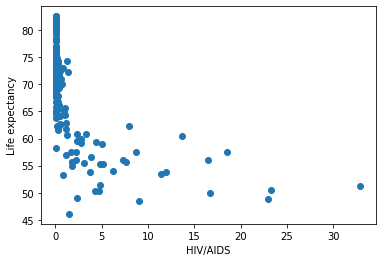

In [12]:
plt.scatter(life_data[' HIV/AIDS'], life_data['Life expectancy '])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

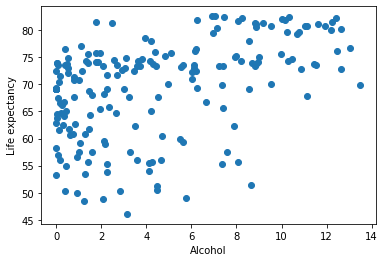

In [13]:
plt.scatter(life_data['Alcohol'], life_data['Life expectancy '])
plt.xlabel('Alcohol')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

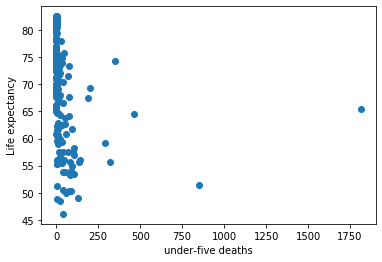

In [14]:
plt.scatter(life_data['under-five deaths '], life_data['Life expectancy '])
plt.xlabel('under-five deaths')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

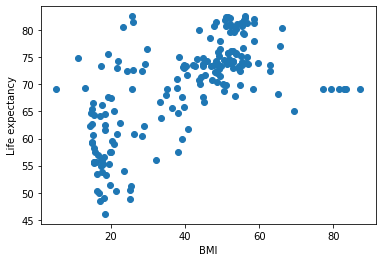

In [15]:
plt.scatter(life_data[' BMI '], life_data['Life expectancy '])
plt.xlabel('BMI')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

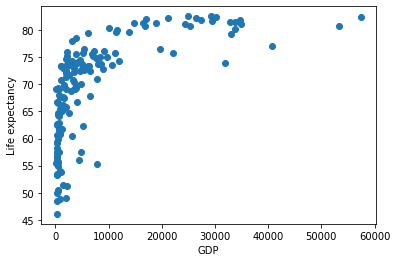

In [16]:
plt.scatter(life_data.GDP, life_data['Life expectancy '])
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

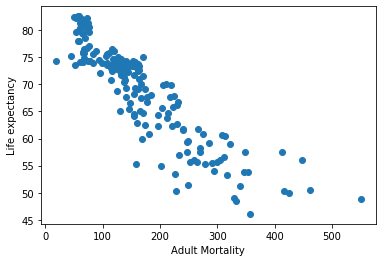

In [17]:
plt.scatter(life_data['Adult Mortality'], life_data['Life expectancy '])
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

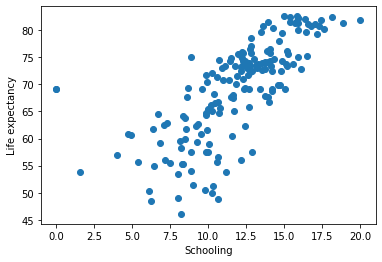

In [18]:
plt.scatter(life_data['Schooling'], life_data['Life expectancy '])
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

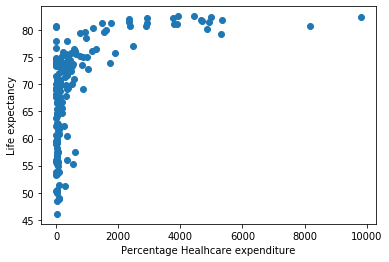

In [19]:
plt.scatter(life_data['percentage expenditure'], life_data['Life expectancy '])
plt.xlabel('Percentage Healhcare expenditure')
plt.ylabel('Life expectancy')

## Linear Regression Model

In [24]:
life_features_train, life_features_test, life_labels_train, life_labels_test = train_test_split(life_features, life_labels, train_size = 0.8, test_size = 0.2)

linear_model = LinearRegression()
linear_model.fit(life_features_train, life_labels_train)
print('R_square score on the training data : %.2f' % linear_model.score(life_features_train, life_labels_train))

linear_model_predict = linear_model.predict(life_features_test)
print('Coefficients: \n', linear_model.coef_)
print("Mean squared error(MSE) : %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error(MAE) : %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))
print('R_square score on test data: %.2f' % r2_score(life_labels_test, linear_model_predict))


R_square score on the training data : 0.93
Coefficients: 
 [-5.29439926e-02  3.77106216e-02  1.46996512e-01  1.08315189e-04
 -2.81693688e-03  8.32475140e-06  4.69957283e-02 -3.51318983e-02
 -2.49280876e-02  1.96631345e-01  8.57870413e-02 -1.59767356e-01
  6.42167078e-05  2.37861346e-08 -1.64958322e-01  2.51764922e-01
  8.75442402e+00  1.81734689e-01 -2.99564749e-01  2.99564749e-01]
Mean squared error(MSE) : 7.65
Mean absolute error(MAE) : 2.24
R_square score on test data: 0.91


## Trying Ridge Regularization L2 

In [25]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Ridge(), param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]}, scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)

print("Best Parameters: " + str(grid_cv.best_params_))
print("R_square score on training data : %.2f" %grid_cv.score(life_features_train, life_labels_train))
print("R_square score on test data : %.2f" % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error(MSE) : %.2f" % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error(MAE) : %.2f" % mean_absolute_error(life_labels_test, linear_model_predict))

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.83967e-31): result may not be accurate.
  overwrite_a=True).T
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.6802e-31): result may not be accurate.
  overwrite_a=True).T
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.22389e-31): result may not be accurate.
  overwrite_a=True).T
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.99467e-31): result may not be accurate.
  overwrite_a=True).T
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.83967e-31): result may not be accurate.
  overwrite_a=True).T
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py

Best Parameters: {'alpha': 9, 'max_iter': 10}
R_square score on training data : 0.93
R_square score on test data : 0.91
Mean squared error(MSE) : 7.65
Mean absolute error(MAE) : 2.24


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Trying Lasso Regularization L1

In [26]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Lasso(),param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)

print("Best Parameters: " + str(grid_cv.best_params_))
print("R_square score on training data: %.2f" % grid_cv.score(life_features_train, life_labels_train))
print("R_square score on test data: %.2f" % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error(MSE): %.2f" % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error(MAE): %.2f" % mean_absolute_error(life_labels_test, linear_model_predict))

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369.5665913050069, tolerance: 0.9907119695691871
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\asus\Anaco

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 419.13432463561753, tolerance: 0.9533343509235387
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 463.0522487482991, tolerance: 1.0275261974686012
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 366.0507312102125, tolerance: 0.9108460616480514
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 667.6063363868855, tolerance: 0.9533343509235387
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 682.1295634445225, tolerance: 1.0275261974686012
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 634.6206915639577, tolerance: 0.9330962734622983
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5

Best Parameters: {'alpha': 1, 'max_iter': 1000}
R_square score on training data: 0.92
R_square score on test data: 0.89
Mean squared error(MSE): 7.65
Mean absolute error(MAE): 2.24


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 710.0632319919665, tolerance: 0.9533343509235387
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 728.3127087188955, tolerance: 1.0275261974686012
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 673.4593370877155, tolerance: 0.9330962734622983
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5

## Trying Elastic Net Regularization L1/L2 

In [27]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(ElasticNet(),param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000], 'l1_ratio' : [0.1, 0.4, 0.8]},scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)

print("Best Parameters: " + str(grid_cv.best_params_))
print("R_square score on training data: %.2f" % grid_cv.score(life_features_train, life_labels_train))
print("R_square score on test data: %.2f" % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error(MSE) : %.2f" % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error(MAE) : %.2f" % mean_absolute_error(life_labels_test, linear_model_predict))

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369.5665913050069, tolerance: 0.9907119695691871
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\asus\Anaco

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 357.4710403778166, tolerance: 0.9533343509235387
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 319.1607767809159, tolerance: 1.0275261974686012
  positive)
C:\Users

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.23544596468173, tolerance: 0.9533343509235387
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318.50140623952234, tolerance: 1.0275261974686012
  positive)
C:\Use

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452.82061548880944, tolerance: 0.9907119695691871
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469.6879820493614, tolerance: 0.9533343509235387
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450.598596133412, tolerance: 1.0275261974686012
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.7367049508937, tolerance: 0.9533343509235387
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464.843489635521, tolerance: 1.0275261974686012
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 428.1057186338414, tolerance: 0.9330962734622983
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338.4457858078785, tolerance: 0.9330962734622983
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 346.35232936597066, tolerance: 0.9108460616480514
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 520.3277951607138, tolerance: 0.9907119695691871
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484.6552827578918, tolerance: 0.9907119695691871
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504.2262909456497, tolerance: 0.9533343509235387
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 493.8546455566609, tolerance: 1.0275261974686012
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496.13001744003293, tolerance: 0.9907119695691871
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516.0192953674393, tolerance: 0.9533343509235387
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 507.9253541462796, tolerance: 1.0275261974686012
  positive)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

Best Parameters: {'alpha': 4, 'l1_ratio': 0.1, 'max_iter': 100}
R_square score on training data: 0.92
R_square score on test data: 0.89
Mean squared error(MSE) : 7.65
Mean absolute error(MAE) : 2.24


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 544.0966423226283, tolerance: 1.204399537136477
  positive)


## Best Model

#### As we can see from the results, the Ridge Regularization which is obtained after the Linear Regression is the best Model we can use to deploy in our WEB-APP.
#### Best Parameters : 
#### R^2 on training : 0.93
#### R^2 on testing : 0.91
#### MAE(Mean absolute error) : 2.24
#### MSE(Mean squared error) : 7.65

## Deployment of machine learning service on IBM Cloud using a Web-app created using NODE-RED

In [2]:
!pip install watson-machine-learning-client

In [3]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-05-29 11:03:36,695 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [4]:
wml_credentials={
  "apikey": "*****************************************",
  "instance_id": "**************************************",
  "password": "***********************************",
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "username": "**************************************"
}

In [5]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [6]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Adarsh Pal", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "adarshpal999@gmail.com", 
               client.repository.ModelMetaNames.NAME: "LifeExpectancy"}

In [7]:
model_artifact =client.repository.store_model(grid_cv, meta_props=model_props)

In [8]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [9]:
published_model_uid

'16fbe2fc-167e-4b19-8766-ebed17398ebc'

In [10]:
deployment = client.deployments.create(published_model_uid, name="LifeExpectancy")



#######################################################################################

Synchronous deployment creation for uid: '16fbe2fc-167e-4b19-8766-ebed17398ebc' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='f8586636-677a-4e73-acb3-dc109cc71c37'
------------------------------------------------------------------------------------------------




## Scoring Endpoint for Machine Learning Service

In [11]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [12]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/246dd8d8-2ca4-47db-92ea-d49fd8e0b104/deployments/f8586636-677a-4e73-acb3-dc109cc71c37/online'